In [1]:
import numpy as np
import pandas as pd
import math
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


### Import merged data so we can do something with it

In [2]:
colo_merged = pd.read_csv('colo_merged.csv')
colo_merged.head()

,Unnamed: 0,zipcode,child capacity,ageless5,pop,Latitude,Longitude,radius_meters,Desert,Few_Child,...,Water Park,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,1,80478,39.0,27,1625,40.001670,-105.86860,5200,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,80480,15.0,89,1342,40.621621,-106.24457,31400,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,80481,486.0,6,601,40.106130,-105.48044,6800,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,80483,36.0,56,660,40.149432,-106.90681,7500,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,80487,594.0,702,17708,40.502772,-106.87521,21700,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Let's also bring in the raw Colorado Venues to use them easily if we need to look futher into them

In [3]:
colo_venues = pd.read_csv('denver_venues.csv')
colo_venues.head()

,Unnamed: 0,zipcode,Zipcode Latitude,Zipcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,80478,40.00167,-105.8686,Tabernash Tavern,39.992848,-105.843889,American Restaurant
1,1,80478,40.00167,-105.8686,Hot Tub Time Machine,39.995027,-105.868007,Mountain
2,2,80478,40.00167,-105.8686,Dashing Thru the Snow,39.988871,-105.880457,Stables
3,3,80478,40.00167,-105.8686,Strawberry Trails (BLM),40.003644,-105.844600,Trail
4,4,80478,40.00167,-105.8686,Snooty Coyote,39.993036,-105.845535,Liquor Store


### Group by zipcode and drop that 'random Unnamed: 0' column

In [4]:
count_venues = colo_venues.groupby('zipcode').count()
count_venues = count_venues.drop(count_venues.columns[1:], axis=1 )

In [5]:
count_venues.columns = ['venue_count']
count_venues = count_venues.reset_index()
count_venues.head()

,zipcode,venue_count
0,80002,24
1,80003,23
2,80004,16
3,80005,10
4,80007,8


### Now we know how many venues are in each zipcode. Let's add this info into 'colo_merged'

In [6]:
colo_merged = count_venues.merge(colo_merged, on = 'zipcode')
colo_merged.head()

,zipcode,venue_count,Unnamed: 0,child capacity,ageless5,pop,Latitude,Longitude,radius_meters,Desert,...,Water Park,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,80002,24,341,1245.0,1096,18211,39.795006,-105.09810,2000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80003,23,342,549.0,2587,36657,39.825357,-105.06439,2100,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80004,16,343,1254.0,2106,37241,39.814310,-105.12263,2200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80005,10,344,462.0,1616,29037,39.843304,-105.11896,2700,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80007,8,345,389.0,799,10174,39.833442,-105.18591,4100,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### I want to compare the ratio of venues to certain variables (population, area, ageless than 5) across the CCD classifications

In [7]:
count_venuesPerVar = colo_merged[['zipcode','venue_count','pop','ageless5','radius_meters','Classification']]
count_venuesPerVar

,zipcode,venue_count,pop,ageless5,radius_meters,Classification
0,80002,24,18211,1096,2000,3
1,80003,23,36657,2587,2100,1
2,80004,16,37241,2106,2200,3
3,80005,10,29037,1616,2700,1
4,80007,8,10174,799,4100,3
...,...,...,...,...,...,...
342,81648,7,2625,194,28200,1
343,81650,8,13147,772,24500,3
344,81652,4,4947,425,7600,1
345,81654,5,1520,131,7500,3


### I'll get those ratios by dividing the appropriate variables

In [8]:
count_venuesPerPR = pd.DataFrame()
count_venuesPerPR['zipcode'] = count_venuesPerVar['zipcode']
count_venuesPerPR['ven_per_pop'] = count_venuesPerVar['venue_count'].div(count_venuesPerVar['pop'], axis=0)
count_venuesPerPR['ven_per_meter'] = count_venuesPerVar['venue_count'].div( (math.pi*(count_venuesPerVar['radius_meters']**2) ), axis=0)
count_venuesPerPR['pop_per_meter'] = count_venuesPerVar['pop'].div( (math.pi*(count_venuesPerVar['radius_meters']**2) ), axis=0)
count_venuesPerPR['Classification'] =count_venuesPerVar['Classification']
count_venuesPerPR['ageless5_per_pop']= count_venuesPerVar['ageless5'].div(count_venuesPerVar['pop'], axis=0)

### adding this to compare..
count_venuesPerPR['ven_per_ageless5']= count_venuesPerVar['venue_count'].div(count_venuesPerVar['ageless5'], axis=0)
count_venuesPerPR.set_index('zipcode')

,ven_per_pop,ven_per_meter,pop_per_meter,Classification,ageless5_per_pop,ven_per_ageless5
zipcode,,,,,,
80002,0.001318,1.909859e-06,0.001449,3,0.060183,0.021898
80003,0.000627,1.660120e-06,0.002646,1,0.070573,0.008891
80004,0.000430,1.052264e-06,0.002449,3,0.056551,0.007597
80005,0.000344,4.366391e-07,0.001268,1,0.055653,0.006188
80007,0.000786,1.514860e-07,0.000193,3,0.078534,0.010013
...,...,...,...,...,...,...
81648,0.002667,2.801883e-09,0.000001,1,0.073905,0.036082
81650,0.000609,4.242364e-09,0.000007,3,0.058721,0.010363
81652,0.000809,2.204362e-08,0.000027,1,0.085911,0.009412


### Let's look visually at how those ratios are distributed across the classifications

#### This is to see how many venues there are distributed across CCD classification. Just raw number, not ratio of population or area.

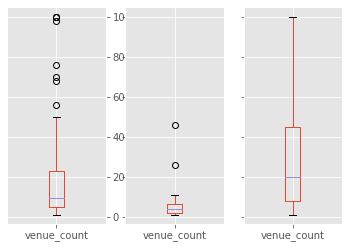

In [9]:
classifV = count_venuesPerVar[count_venuesPerVar['Classification']==1]
classifV2 = count_venuesPerVar[count_venuesPerVar['Classification']==2]
classifV3 = count_venuesPerVar[count_venuesPerVar['Classification']==3]

#fig, axes = plt.subplots(nrows=1,ncols=3)

fig, (ax, ax2,ax3) = plt.subplots(ncols=3, sharey=True)

ax.invert_xaxis()
ax.yaxis.tick_right()

classifV['venue_count'].plot(kind='box', ax = ax,figsize=(8, 5), subplots=True )
classifV2['venue_count'].plot(kind='box', ax = ax2,figsize=(8, 5), subplots=True )
classifV3['venue_count'].plot(kind='box', ax = ax3, figsize=(8, 5), subplots=True )

plt.show()

#### There are more venues in the 'Not Desert' class overall. But this could be because there is a greater area and or more people.
#### Let's look further. 

In [10]:
print(classifV['venue_count'].describe())
print(classifV2['venue_count'].describe())
print(classifV3['venue_count'].describe())

count    104.000000
mean      18.788462
std       22.396547
min        1.000000
25%        5.000000
50%        9.500000
75%       23.000000
max      100.000000
Name: venue_count, dtype: float64
count    39.000000
mean      5.615385
std       8.034843
min       1.000000
25%       2.000000
50%       4.000000
75%       6.500000
max      46.000000
Name: venue_count, dtype: float64
count    204.000000
mean      30.245098
std       29.220223
min        1.000000
25%        7.750000
50%       20.000000
75%       45.000000
max      100.000000
Name: venue_count, dtype: float64


#### Now I'll explore if this is still true if we factor in population. 

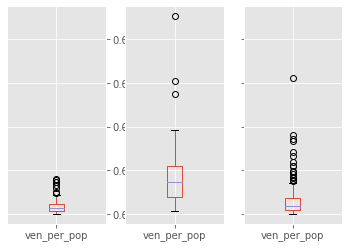

In [11]:
classif = count_venuesPerPR[count_venuesPerPR['Classification']==1]
classif2 = count_venuesPerPR[count_venuesPerPR['Classification']==2]
classif3 = count_venuesPerPR[count_venuesPerPR['Classification']==3]

#fig, axes = plt.subplots(nrows=1,ncols=3)

fig, (ax, ax2,ax3) = plt.subplots(ncols=3, sharey=True)

ax.invert_xaxis()
ax.yaxis.tick_right()

classif['ven_per_pop'].plot(kind='box', ax = ax,figsize=(8, 5), subplots=True )
classif2['ven_per_pop'].plot(kind='box', ax = ax2,figsize=(8, 5), subplots=True )
classif3['ven_per_pop'].plot(kind='box', ax = ax3, figsize=(8, 5), subplots=True )

plt.show()

### We see that the 'Few Children' has a higher ratio of venues per person.
### But still there are more venues per person (on average .001173) in the non dessert vs the dessert. Deserts have only 61% of the venues per peson that Non-Deserts have according to this.

In [12]:
print(classif['ven_per_pop'].describe())
print(classif2['ven_per_pop'].describe())
print(classif3['ven_per_pop'].describe())

count    104.000000
mean       0.001840
std        0.001714
min        0.000144
25%        0.000679
50%        0.001366
75%        0.002333
max        0.007952
Name: ven_per_pop, dtype: float64
count    39.000000
mean      0.009288
std       0.008804
min       0.000810
25%       0.003927
50%       0.007317
75%       0.010902
max       0.045161
Name: ven_per_pop, dtype: float64
count    204.000000
mean       0.003013
std        0.003675
min        0.000058
25%        0.000991
50%        0.001911
75%        0.003598
max        0.031049
Name: ven_per_pop, dtype: float64


In [13]:
### How about for Children how many children are there per person across each classification

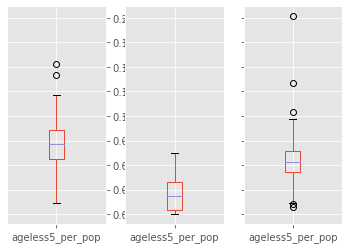

In [14]:
classif = count_venuesPerPR[count_venuesPerPR['Classification']==1]
classif2 = count_venuesPerPR[count_venuesPerPR['Classification']==2]
classif3 = count_venuesPerPR[count_venuesPerPR['Classification']==3]

#fig, axes = plt.subplots(nrows=1,ncols=3)

fig, (ax, ax2,ax3) = plt.subplots(ncols=3, sharey=True)

ax.invert_xaxis()
ax.yaxis.tick_right()

classif['ageless5_per_pop'].plot(kind='box', ax = ax,figsize=(8, 5), subplots=True )
classif2['ageless5_per_pop'].plot(kind='box', ax = ax2,figsize=(8, 5), subplots=True )
classif3['ageless5_per_pop'].plot(kind='box', ax = ax3, figsize=(8, 5), subplots=True )

plt.show()

In [15]:
print(classif['ageless5_per_pop'].describe())
print(classif2['ageless5_per_pop'].describe())
print(classif3['ageless5_per_pop'].describe())

count    104.000000
mean       0.072026
std        0.022672
min        0.011588
25%        0.055808
50%        0.071098
75%        0.085337
max        0.152656
Name: ageless5_per_pop, dtype: float64
count    39.000000
mean      0.020212
std       0.017287
min       0.000000
25%       0.004065
50%       0.018639
75%       0.032549
max       0.061966
Name: ageless5_per_pop, dtype: float64
count    204.000000
mean       0.054910
std        0.020927
min        0.007583
25%        0.042681
50%        0.053525
75%        0.064219
max        0.201681
Name: ageless5_per_pop, dtype: float64


### How about instead of population we look at how many venues there are per square meter of the zipcode sampled. 

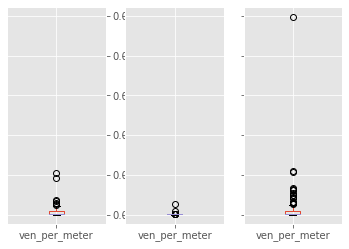

In [16]:
#fig, axes = plt.subplots(nrows=1,ncols=3)

fig, (ax, ax2,ax3) = plt.subplots(ncols=3, sharey=True)

ax.invert_xaxis()
ax.yaxis.tick_right()

#df["a"].plot(kind='barh', x='LABEL',  legend=False, ax=ax)
#df2["b"].plot(kind='barh', x='LABEL',ax=ax2)
#plt.show()


classif['ven_per_meter'].plot(kind='box', ax = ax,figsize=(8, 5), subplots=True )
classif2['ven_per_meter'].plot(kind='box', ax = ax2,figsize=(8, 5), subplots=True )
classif3['ven_per_meter'].plot(kind='box', ax = ax3, figsize=(8, 5), subplots=True )
#plt.title('Histogram of Venue Count Frequency across Colorado ZIP codes') # add a title to the histogram
#plt.ylabel('Number of Venues') # add y-label
#plt.xlabel('Number of ZIP codes') # add x-label

plt.show()

### On average there are more venues per meter in the Non Desert class zipcodes. There are few people in  a large area and few venues in the 'Few Children' class. There are more outliers for the 'Non Desert' class tending toward higher venue per meter count. But this is tiny...

In [17]:
print(classif['ven_per_meter'].describe())
print(classif2['ven_per_meter'].describe())
print(classif3['ven_per_meter'].describe())

count    1.040000e+02
mean     7.264633e-07
std      1.508631e-06
min      1.155138e-09
25%      1.512625e-08
50%      1.122732e-07
75%      9.549297e-07
max      1.044454e-05
Name: ven_per_meter, dtype: float64
count    3.900000e+01
mean     1.100356e-07
std      4.269423e-07
min      3.837648e-10
25%      2.971767e-09
50%      6.653436e-09
75%      2.143862e-08
max      2.546479e-06
Name: ven_per_meter, dtype: float64
count    2.040000e+02
mean     1.088638e-06
std      3.795897e-06
min      7.724281e-10
25%      2.170021e-08
50%      1.430245e-07
75%      9.846794e-07
max      4.973592e-05
Name: ven_per_meter, dtype: float64


### And finaly let's test to see what CCD class if more densely populated. This is an estimate since I did not use the actual area of each zipcode but instead a metric that I used to survey an area proportional to the area in the Colorado database. 

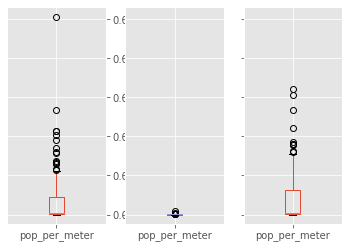

In [18]:
#fig, axes = plt.subplots(nrows=1,ncols=3)

fig, (ax, ax2,ax3) = plt.subplots(ncols=3, sharey=True)

ax.invert_xaxis()
ax.yaxis.tick_right()

classif['pop_per_meter'].plot(kind='box', ax = ax,figsize=(8, 5), subplots=True )
classif2['pop_per_meter'].plot(kind='box', ax = ax2,figsize=(8, 5), subplots=True )
classif3['pop_per_meter'].plot(kind='box', ax = ax3, figsize=(8, 5), subplots=True )

plt.show()

#### There are more people per meter in the desert vs non desert.  8.157751e-04 vs 7.658299e-04. That is only about 5e-05 per person. Not much per person, but once multiplied by the millions of people in each class, it adds up. All this indicates that in terms of venues, Child Care centers are not the only venues that 'CCD deserts' have fewer of.

In [19]:
print(classif['pop_per_meter'].describe())
print(classif2['pop_per_meter'].describe())
print(classif3['pop_per_meter'].describe())

count    1.040000e+02
mean     8.157751e-04
std      1.510433e-03
min      3.736607e-07
25%      9.666193e-06
50%      8.612289e-05
75%      9.024981e-04
max      1.012922e-02
Name: pop_per_meter, dtype: float64
count    3.900000e+01
mean     9.083937e-06
std      3.142723e-05
min      1.174320e-07
25%      4.230076e-07
50%      1.321279e-06
75%      3.554190e-06
max      1.909859e-04
Name: pop_per_meter, dtype: float64
count    2.040000e+02
mean     7.658299e-04
std      1.202828e-03
min      3.408434e-07
25%      7.702478e-06
50%      5.338886e-05
75%      1.271398e-03
max      6.427373e-03
Name: pop_per_meter, dtype: float64


### Overall the largest differences I could observe across the CCD classifications is that on average there are more venues per person in Non-Deserts. And there are more children under 5 per person in Deserts. Accordingly, there are more venues per child under 5 in Non-Deserts. This is in the same pattern as the defenition of Deserts, where there are fewer Child-Care options for children in these zip codes. There are also less venue options for 'children' in other categories too. Could this signal Food Deserts?

### Let's check this: There should be more venues per child in non-deserts than deserts. 

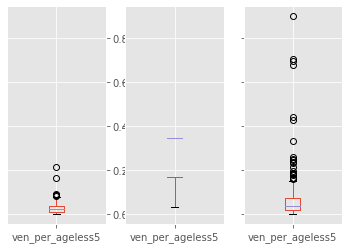

In [20]:
#fig, axes = plt.subplots(nrows=1,ncols=3)

fig, (ax, ax2,ax3) = plt.subplots(ncols=3, sharey=True)

ax.invert_xaxis()
ax.yaxis.tick_right()

classif

classif['ven_per_ageless5'].plot(kind='box', ax = ax,figsize=(8, 5), subplots=True )
classif2['ven_per_ageless5'].plot(kind='box', ax = ax2,figsize=(8, 5), subplots=True )
classif3['ven_per_ageless5'].plot(kind='box', ax = ax3, figsize=(8, 5), subplots=True )

plt.show()

In [21]:
print(classif['ven_per_ageless5'].describe())
print(classif2['ven_per_ageless5'].describe())
print(classif3['ven_per_ageless5'].describe())

count    104.000000
mean       0.029251
std        0.031595
min        0.001800
25%        0.009133
50%        0.021597
75%        0.037594
max        0.216080
Name: ven_per_ageless5, dtype: float64
count    39.000000
mean           inf
std            NaN
min       0.034483
25%       0.170290
50%       0.344828
75%            inf
max            inf
Name: ven_per_ageless5, dtype: float64
count    204.000000
mean       0.072516
std        0.118875
min        0.000433
25%        0.017341
50%        0.035869
75%        0.071920
max        0.900901
Name: ven_per_ageless5, dtype: float64


#### As observed, there are 2.47 X times more venues per child in the Non-Deserts than in Deserts. Approximate to the 3 times amount that is needed to be classified as a Non-Desert because child care centers are available. In the "Few Children" there are so few children in the zip code that the average is "Infinite" venues per child.

# Part II: Now lets look at what types of venues occur with higher frequency within each class

### I want to see how many stores there are overall in each zip code so I will take the ratios that the one hot encoding gave me and get the total of each venue type by multiplying by the venue count of each zip code.

### This will allow me to compare across zip codes because the ratios  may be un-proportional due to the drastically different venue counts across each zip code.

In [22]:
colo_merged2 =pd.concat([colo_merged[colo_merged.columns[0:13]],(colo_merged[colo_merged.columns[14:]].mul(count_venues['venue_count'],axis =0))], axis=1)
colo_merged2.head()

,zipcode,venue_count,Unnamed: 0,child capacity,ageless5,pop,Latitude,Longitude,radius_meters,Desert,...,Water Park,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,80002,24,341,1245.0,1096,18211,39.795006,-105.09810,2000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80003,23,342,549.0,2587,36657,39.825357,-105.06439,2100,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80004,16,343,1254.0,2106,37241,39.814310,-105.12263,2200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80005,10,344,462.0,1616,29037,39.843304,-105.11896,2700,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80007,8,345,389.0,799,10174,39.833442,-105.18591,4100,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Which stores happen within each classification in total (not by zipcode)
df_class = colo_merged2.groupby('Classification').sum()
df_class.head()



,zipcode,venue_count,Unnamed: 0,child capacity,ageless5,pop,Latitude,Longitude,radius_meters,Desert,...,Water Park,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
Classification,,,,,,,,,,,,,,,,,,,,,
1,8392233,1954,19087,28850.0,124063,1679885,4111.572052,-10943.030048,875200,104,...,0.0,0.0,1.0,4.0,2.0,4.0,6.0,1.0,1.0,1.0
2,3156673,219,7778,3840.0,477,27225,1516.362436,-4110.860200,493100,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,16461748,6170,39329,136700.0,198091,3527451,8006.311937,-21507.232935,1857200,0,...,1.0,1.0,2.0,9.0,4.0,1.0,13.0,8.0,12.0,2.0


### Separating different variables I'll use further on.

In [24]:
pop_class1 = df_class.loc[1,'pop']
pop_class2 = df_class.loc[2,'pop']
pop_class3 = df_class.loc[3,'pop']

venCoun_class1 = df_class.loc[1,'venue_count']
venCoun_class2 = df_class.loc[2,'venue_count']
venCoun_class3 = df_class.loc[3,'venue_count']

#Checking my syntax for what I want is correct
print(pop_class3)
venCoun_class3

3527451


6170

In [25]:
# Now I can drop everything but the venues to study them
df_classVen = df_class.drop(df_class.columns[0:13], axis=1 )

### As you can observe, they are whole numbers - as they should. 

In [26]:
df_classVen

,Accessories Store,Adult Boutique,Advertising Agency,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,...,Water Park,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
Classification,,,,,,,,,,,,,,,,,,,,,
1,2.0,0.0,0.0,4.0,1.0,1.0,1.0,4.0,1.0,52.0,...,0.0,0.0,1.0,4.0,2.0,4.0,6.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5.0,1.0,2.0,17.0,0.0,0.0,1.0,6.0,2.0,233.0,...,1.0,1.0,2.0,9.0,4.0,1.0,13.0,8.0,12.0,2.0


In [27]:
df_classVen.to_csv(r'df_classVen.csv')


In [28]:
df_classVen = pd.read_csv('df_classVen.csv')

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Classification']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
classification_venues_sorted = pd.DataFrame(columns=columns)
classification_venues_sorted['Classification'] = df_classVen['Classification']

for ind in np.arange(df_classVen.shape[0]):
    classification_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_classVen.iloc[ind, :], num_top_venues)

classification_venues_sorted

,Classification,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Fast Food Restaurant,Mexican Restaurant,Pizza Place,Coffee Shop,Convenience Store,Sandwich Place,American Restaurant,Park,Grocery Store,Hotel
1,2,American Restaurant,Trail,Hotel,Campground,Bar,Restaurant,Resort,Coffee Shop,Ski Area,BBQ Joint
2,3,Coffee Shop,Pizza Place,Fast Food Restaurant,Mexican Restaurant,American Restaurant,Hotel,Sandwich Place,Grocery Store,Park,Convenience Store


### After sorting I can see that there are more fast food and mexican restaurants in the Deserts and more coffee shops and pizza places in the non-deserts. Does this indicate there may be a demographic difference in each zip code classification?

### I'm taking the top 10 of each list and creating a list of the unique venues of all these.

In [31]:
classification_venues_sorted.to_csv(r'classification_venues_sorted.csv')

In [32]:
list_class = classification_venues_sorted.values.tolist()
list_class = list_class[1]+list_class[2]+list_class[0]
list_class.remove(1)
list_class.remove(2)
list_class.remove(3)
list_class

['American Restaurant',
 'Trail',
 'Hotel',
 'Campground',
 'Bar',
 'Restaurant',
 'Resort',
 'Coffee Shop',
 'Ski Area',
 'BBQ Joint',
 'Coffee Shop',
 'Pizza Place',
 'Fast Food Restaurant',
 'Mexican Restaurant',
 'American Restaurant',
 'Hotel',
 'Sandwich Place',
 'Grocery Store',
 'Park',
 'Convenience Store',
 'Fast Food Restaurant',
 'Mexican Restaurant',
 'Pizza Place',
 'Coffee Shop',
 'Convenience Store',
 'Sandwich Place',
 'American Restaurant',
 'Park',
 'Grocery Store',
 'Hotel']

In [33]:
x10 = np.array(list_class) 
x10 = np.unique(x10)
x10

array(['American Restaurant', 'BBQ Joint', 'Bar', 'Campground',
       'Coffee Shop', 'Convenience Store', 'Fast Food Restaurant',
       'Grocery Store', 'Hotel', 'Mexican Restaurant', 'Park',
       'Pizza Place', 'Resort', 'Restaurant', 'Sandwich Place',
       'Ski Area', 'Trail'], dtype='<U20')

### These are the unique places in the top 10 of the 3 classifcations
### Let's drop from df_class places that are not in the top 10. This leaves me with the actual number of venues of the top 10 in each class. 

In [34]:
df_classVen = df_classVen[x10]

In [35]:
df_classVen

,American Restaurant,BBQ Joint,Bar,Campground,Coffee Shop,Convenience Store,Fast Food Restaurant,Grocery Store,Hotel,Mexican Restaurant,Park,Pizza Place,Resort,Restaurant,Sandwich Place,Ski Area,Trail
0,52.0,9.0,31.0,6.0,78.0,75.0,97.0,46.0,46.0,92.0,47.0,84.0,1.0,23.0,68.0,0.0,22.0
1,17.0,5.0,9.0,12.0,6.0,4.0,0.0,2.0,12.0,2.0,3.0,4.0,6.0,9.0,0.0,6.0,16.0
2,233.0,38.0,109.0,26.0,298.0,116.0,241.0,136.0,203.0,237.0,134.0,267.0,34.0,73.0,194.0,63.0,90.0


### Now create a bar graph to visualize

                        0     1      2
American Restaurant  52.0  17.0  233.0
BBQ Joint             9.0   5.0   38.0
Bar                  31.0   9.0  109.0
Campground            6.0  12.0   26.0
Coffee Shop          78.0   6.0  298.0


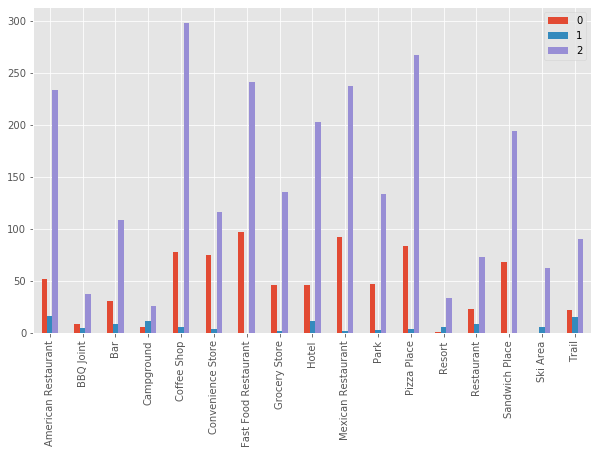

In [36]:
df_tClass = df_classVen.transpose()
df_tClass.plot(kind='bar', figsize=(10,6))
print(df_tClass.head())
plt.show()

### The non deserts have more of everything. Is this because there are more people? Lets scale for population. 

In [37]:
total_pop = pop_class1+pop_class2+pop_class3
df_tCNorm = df_classVen
df_tCNorm.iloc[0] = (df_tCNorm.iloc[0]).divide(pop_class1)
df_tCNorm.iloc[1] = (df_tCNorm.iloc[1]).divide(pop_class2)
df_tCNorm.iloc[2] = (df_tCNorm.iloc[2]).divide(pop_class3)
df_tCNorm



,American Restaurant,BBQ Joint,Bar,Campground,Coffee Shop,Convenience Store,Fast Food Restaurant,Grocery Store,Hotel,Mexican Restaurant,Park,Pizza Place,Resort,Restaurant,Sandwich Place,Ski Area,Trail
0,0.000031,0.000005,0.000018,0.000004,0.000046,0.000045,0.000058,0.000027,0.000027,0.000055,0.000028,0.000050,5.952788e-07,0.000014,0.000040,0.000000,0.000013
1,0.000624,0.000184,0.000331,0.000441,0.000220,0.000147,0.000000,0.000073,0.000441,0.000073,0.000110,0.000147,2.203857e-04,0.000331,0.000000,0.000220,0.000588
2,0.000066,0.000011,0.000031,0.000007,0.000084,0.000033,0.000068,0.000039,0.000058,0.000067,0.000038,0.000076,9.638688e-06,0.000021,0.000055,0.000018,0.000026


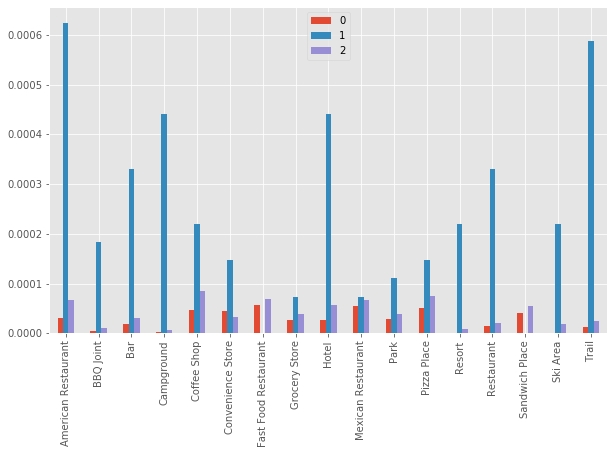

In [38]:
df_tCNorm = df_tCNorm.transpose()
df_tCNorm.plot(kind='bar', figsize=(10,6))
plt.show()

### As before the 'Few Children' CCD class have a high proportion of venues per person. Probably due to these being tourist or rest areas that serve people coming from other areas not living in that zipcode. 
### I'll remove the 'Few Children' class to study the differences between 'Desert' and 'Non Desert' zipcodes. 

                                 0         2
American Restaurant   3.095450e-05  0.000066
BBQ Joint             5.357510e-06  0.000011
Bar                   1.845364e-05  0.000031
Campground            3.571673e-06  0.000007
Coffee Shop           4.643175e-05  0.000084
Convenience Store     4.464591e-05  0.000033
Fast Food Restaurant  5.774205e-05  0.000068
Grocery Store         2.738283e-05  0.000039
Hotel                 2.738283e-05  0.000058
Mexican Restaurant    5.476565e-05  0.000067
Park                  2.797811e-05  0.000038
Pizza Place           5.000342e-05  0.000076
Resort                5.952788e-07  0.000010
Restaurant            1.369141e-05  0.000021
Sandwich Place        4.047896e-05  0.000055
Ski Area              0.000000e+00  0.000018
Trail                 1.309613e-05  0.000026


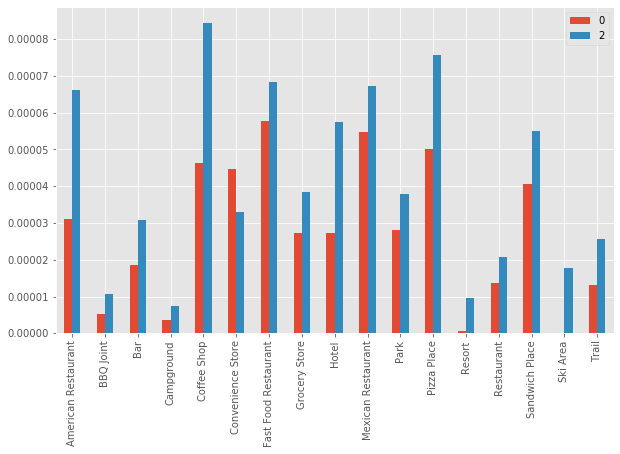

In [39]:
df_tCNorm2 = pd.concat([df_tCNorm[0],df_tCNorm[2]], axis=1)
print(df_tCNorm2)
df_tCNorm2.plot(kind='bar', figsize=(10,6))
plt.show()

### There are still more venues per person in the non desert once scalled for population. 

American Restaurant     2.133886
BBQ Joint               2.010757
Bar                     1.674493
Campground              2.063672
Coffee Shop             1.819450
Convenience Store       0.736572
Fast Food Restaurant    1.183216
Grocery Store           1.407990
Hotel                   2.101632
Mexican Restaurant      1.226815
Park                    1.357768
Pizza Place             1.513737
Restaurant              1.511519
Sandwich Place          1.358662
Ski Area                     inf
Trail                   1.948222
dtype: float64


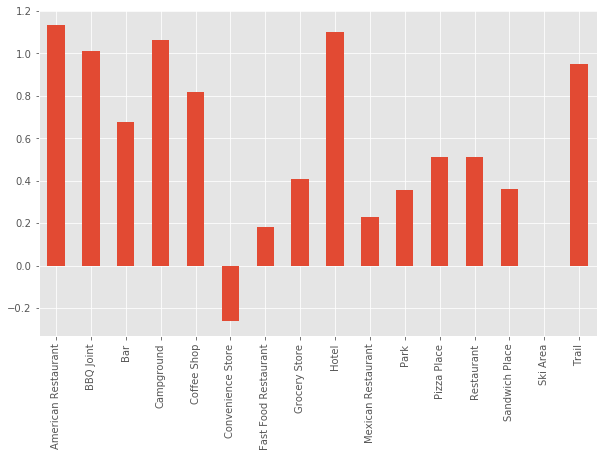

In [40]:
df_ratio = df_tCNorm2[2].divide(df_tCNorm[0])
# Drop a row by condition

##Resort is a major outlier being at 16 times more likely to be in a Non-Desert than
## a Desert so hence why I remove it to look at the other values more closely
df_ratio = df_ratio.drop(labels='Resort')

print(df_ratio)
df_ratioMinus1 = df_ratio -1
df_ratioMinus1.plot(kind='bar', figsize=(10,6))
plt.show()

### I subtracted one to be able to see clearly which venues stood out as having more of or less in the Non-Desert vs desert. Although for example Mexican Restaurants happen more frequently in 'Deserts' there are still more Mexican restaurants per person in 'Non-Deserts'. From before we saw that there was not that great of a difference of venues per person but there are many more top venues per person in the non-desert than desert. This appears to indacate that Non-Deserts are more specialized (homogeneous)? For example they have more coffee shops per person than having another type of shop. 
### The only thing Child Care 'Deserts' have more of are convenience stores amongst the top venues. 
### Resorts happen exclusively in Non-Deserts. There are no resorts in Deserts. People who don't have Child Care readily available don't have resorts readily available either?

### Also Coffee Shops are the most frequent in non-deserts and have the highest ratio compared to deserts. There are more convenince stores in Deserts and happen more frequently. Let's look at these two vaiables to see if we can use them as a predictor of being a Desert or Non-Desert.

# Part III: Can we use this as a predictor?

In [41]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## So we saw that convenience stores are the only thing that 'Deserts' have more venues per person than 'Non-Deserts'. Also Coffee shops are more frequent in Non-Deserts so I want to plot and visualize this. 

### Lets prepare the data ratios that could help us find a model?

In [42]:
df_plotTopVen = pd.concat([colo_merged2['Classification'], colo_merged['ageless5'], colo_merged['Cluster Labels'], colo_merged2['pop'], colo_merged2['venue_count'], colo_merged2['Convenience Store'],colo_merged2['Coffee Shop'], colo_merged2['American Restaurant']],axis=1)
df_plotTopVen = df_plotTopVen[df_plotTopVen['Classification']!=2]
df_plotTopVen['Ven_Pop'] = df_plotTopVen['venue_count'].div(df_plotTopVen['pop'])
df_plotTopVen['Coffee Shop'] = df_plotTopVen['Coffee Shop'].div(df_plotTopVen['pop'])
df_plotTopVen['Convenience Store'] = df_plotTopVen['Convenience Store'].div(df_plotTopVen['pop'])
df_plotTopVen['American Restaurant'] = df_plotTopVen['American Restaurant'].div(df_plotTopVen['pop'])
df_plotTopVen['ven_ageless5'] = df_plotTopVen['venue_count'].div(df_plotTopVen['ageless5'])
df_plotTopVen

,Classification,ageless5,Cluster Labels,pop,venue_count,Convenience Store,Coffee Shop,American Restaurant,Ven_Pop,ven_ageless5
0,3,1096,2.0,18211,24,0.000000,0.000000,0.000000,0.001318,0.021898
1,1,2587,2.0,36657,23,0.000027,0.000027,0.000027,0.000627,0.008891
2,3,2106,2.0,37241,16,0.000027,0.000000,0.000000,0.000430,0.007597
3,1,1616,2.0,29037,10,0.000034,0.000000,0.000000,0.000344,0.006188
4,3,799,2.0,10174,8,0.000000,0.000000,0.000000,0.000786,0.010013
...,...,...,...,...,...,...,...,...,...,...
342,1,194,2.0,2625,7,0.000381,0.000381,0.000000,0.002667,0.036082
343,3,772,2.0,13147,8,0.000000,0.000000,0.000000,0.000609,0.010363
344,1,425,2.0,4947,4,0.000000,0.000000,0.000000,0.000809,0.009412
345,3,131,2.0,1520,5,0.000000,0.000000,0.000000,0.003289,0.038168


I print to csv to be able to look and check at the entire dataframe. 

In [43]:
df_plotTopVen.to_csv(r'df_plotTopVen.csv')

### Let's plot Coffee Shop vs Convenience Store vs Venues per AgeLess5

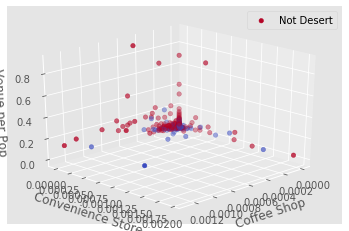

In [44]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_plotTopVen['Coffee Shop'],df_plotTopVen['Convenience Store'], df_plotTopVen['ven_ageless5'],c=df_plotTopVen['Classification'], cmap='coolwarm')

ax.set_xlabel('Coffee Shop')
ax.set_ylabel('Convenience Store')
ax.set_zlabel('Venue per Pop')

ax.view_init(25, 45)
ax.legend(['Not Desert'])

plt.show()

### Let's plot Coffee Shop vs Convenience Store vs Venues per Pop

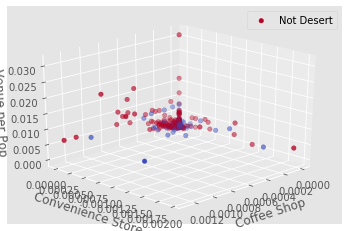

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_plotTopVen['Coffee Shop'],df_plotTopVen['Convenience Store'], df_plotTopVen['Ven_Pop'],c=df_plotTopVen['Classification'], cmap='coolwarm')

ax.set_xlabel('Coffee Shop')
ax.set_ylabel('Convenience Store')
ax.set_zlabel('Venue per Pop')

ax.view_init(25, 45)
ax.legend(['Not Desert'])
#ax.set_zlabel('American Restaurant')


#plt.axis([0,.0002,0,.0002])
ax.view_init(25, 45)
ax.legend(['Not Desert'])
#ax.set_zlabel('American Restaurant')

plt.show()

### How about just Venue to Convenience Store?

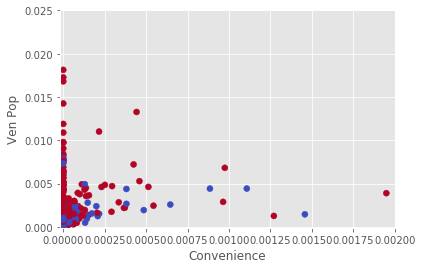

In [46]:
plt.scatter(df_plotTopVen['Convenience Store'], df_plotTopVen['Ven_Pop'],c=df_plotTopVen['Classification'], cmap='coolwarm')
plt.xlabel('Convenience')
plt.ylabel('Ven Pop')
plt.axis([-0.00002,.002,-0.0001,.025])
plt.show()

We can see Deserts have a lower venue per population count and a slightly higher concenince store numbers in certain zipcodes. 

### Let's plot Venue per AgeLess5 to Covenince store to see if we can separate these two groups further. 

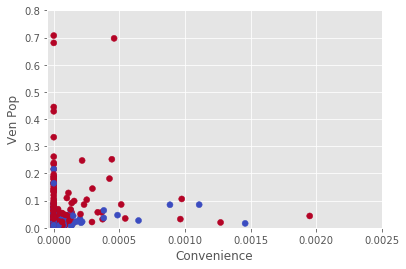

In [47]:
plt.scatter(df_plotTopVen['Convenience Store'], df_plotTopVen['ven_ageless5'],c=df_plotTopVen['Classification'], cmap='coolwarm')
plt.xlabel('Convenience')
plt.ylabel('Ven Pop')
plt.axis([-0.00005,.0025,-0.0001,.8])
plt.show()

The graph looks pretty similar to the Venues per Pop graph above. 

### And just to check I'll plot Venues per Population versus Coffee Shops. 

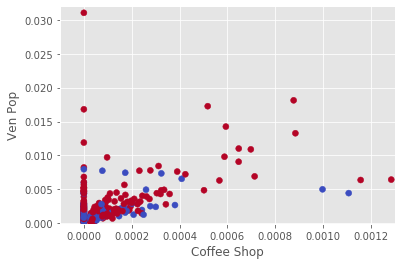

In [48]:
plt.scatter(df_plotTopVen['Coffee Shop'], df_plotTopVen['Ven_Pop'],c=df_plotTopVen['Classification'], cmap='coolwarm')
plt.xlabel('Coffee Shop')
plt.ylabel('Ven Pop')
plt.axis([-0.0001,.0013,-0.0001,.032])
plt.show()

The Deserts tend to cluster closer to the origin. 

### Can we create an unsupervised model clustering these categories?

In [49]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

In [50]:
X,y= df_plotTopVen[['Coffee Shop','Convenience Store','Ven_Pop', 'American Restaurant', 'ven_ageless5']], df_plotTopVen['Classification']

In [51]:
X

,Coffee Shop,Convenience Store,Ven_Pop,American Restaurant,ven_ageless5
0,0.000000,0.000000,0.001318,0.000000,0.021898
1,0.000027,0.000027,0.000627,0.000027,0.008891
2,0.000000,0.000027,0.000430,0.000000,0.007597
3,0.000000,0.000034,0.000344,0.000000,0.006188
4,0.000000,0.000000,0.000786,0.000000,0.010013
...,...,...,...,...,...
342,0.000381,0.000381,0.002667,0.000000,0.036082
343,0.000000,0.000000,0.000609,0.000000,0.010363
344,0.000000,0.000000,0.000809,0.000000,0.009412
345,0.000000,0.000000,0.003289,0.000000,0.038168


In [52]:
### Doing test with top 10 of all the venues
colo_mergedRadN2 =pd.concat((colo_merged['Classification'],colo_merged[x10]), axis=1)
#colo_mergedRadN2

colo_mergedRadN2

,Classification,American Restaurant,BBQ Joint,Bar,Campground,Coffee Shop,Convenience Store,Fast Food Restaurant,Grocery Store,Hotel,Mexican Restaurant,Park,Pizza Place,Resort,Restaurant,Sandwich Place,Ski Area,Trail
0,3,0.000000,0.00,0.0000,0.0,0.000000,0.000000,0.125000,0.0000,0.000000,0.083333,0.166667,0.083333,0.00,0.0,0.041667,0.00,0.00
1,1,0.043478,0.00,0.0000,0.0,0.043478,0.043478,0.130435,0.0000,0.000000,0.000000,0.130435,0.043478,0.00,0.0,0.043478,0.00,0.00
2,3,0.000000,0.00,0.0625,0.0,0.000000,0.062500,0.062500,0.0625,0.000000,0.062500,0.062500,0.000000,0.00,0.0,0.000000,0.00,0.00
3,1,0.000000,0.00,0.0000,0.0,0.000000,0.100000,0.100000,0.0000,0.000000,0.000000,0.000000,0.100000,0.00,0.0,0.100000,0.00,0.00
4,3,0.000000,0.00,0.1250,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.125000,0.000000,0.00,0.0,0.000000,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,1,0.000000,0.00,0.0000,0.0,0.142857,0.142857,0.000000,0.0000,0.142857,0.000000,0.000000,0.142857,0.00,0.0,0.142857,0.00,0.00
343,3,0.000000,0.00,0.0000,0.0,0.000000,0.000000,0.000000,0.1250,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.00,0.00
344,1,0.000000,0.00,0.0000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.00,0.00
345,3,0.000000,0.00,0.0000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.00,0.00


In [53]:
colo_mergedRadN2 = colo_mergedRadN2[~np.any(np.isnan(colo_mergedRadN2), axis=1)]
colo_mergedRadN2.shape

(347, 18)

In [54]:
X = colo_mergedRadN2
X,y = X.drop('Classification', axis=1), colo_mergedRadN2['Classification']

In [55]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(347, 17)

In [56]:
X_scaled = X_scaled [~np.any(np.isnan(X_scaled ), axis=1)]

In [57]:
X_scaled.shape

(347, 17)

In [58]:
# cluster the data into two clusters
dbscan = DBSCAN(eps=.8, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)



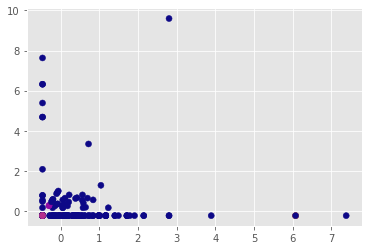

In [59]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap="plasma")
#plt.xlabel("Feature 0")
#plt.ylabel("Feature 1")

In [60]:
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1,
        4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  4, -1, -1, -1, -1, -1,  5, -1, -1, -1,
       -1,  6,  7,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1,
       -1, -1, -1,  9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1,  5,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  8,  6, -1, -1, -1, -1, -1, -1,
       -1, -1,  6,  6, -1, -1,  0,  6, -1, -1, -1,  6, -1, 10, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  6,  6,  6, -1, -1,  6, -1, 11, -1, -1,
       -1, -1,  6, -1, -1,  3, -1, -1, -1, 12,  9, -1,  6, 13,  7, 11, 14,
       -1, -1,  6, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [61]:
y

0      3
1      1
2      3
3      1
4      3
      ..
342    1
343    3
344    1
345    3
346    3
Name: Classification, Length: 347, dtype: int64

In [62]:
y = y.to_numpy()
y

array([3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3,
       3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 2, 3, 2, 3, 1, 3, 3, 3, 1, 2, 3, 2, 1, 2, 3, 3, 1,
       3, 3, 1, 2, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3,
       2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3,
       1, 1, 2, 3, 1, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 3, 3, 3, 3,
       1, 2, 1, 2, 1, 2, 3, 1, 3, 2, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 1,
       2, 3, 3, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2,
       3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,

### I'll do it using K-Means and see aswell. 

In [63]:
from sklearn import cluster, datasets
X_kMeans = X_scaled
y_kMeans = y

k_means = cluster.KMeans(n_clusters=8)
k_means.fit(X_kMeans) 

print(k_means.labels_[::10])

print(y_kMeans[::10])

[4 4 3 4 4 4 3 4 4 3 2 1 4 7 7 4 3 1 3 4 3 4 4 3 2 3 0 4 3 3 4 3 4 4 6]
[3 3 3 3 3 1 3 3 1 1 3 2 3 3 3 3 1 3 1 1 1 3 3 1 3 2 2 1 2 3 3 3 3 3 2]


In [64]:
from sklearn.metrics.cluster import adjusted_rand_score
#k-means performance:
print("ARI =", adjusted_rand_score(y, k_means.labels_))

#DBSCAN performance:
print("ARI =", adjusted_rand_score(y, (clusters)))


ARI = 0.05508497477069854
ARI = 0.056309706560610316


It's pretty bad. Even when playing with Epsilon and min-samples in DBSCAN.

### Let's Try With SVM

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (277, 17) (277,)
Test set: (70, 17) (70,)


In [147]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.utils import class_weight
from sklearn.linear_model.stochastic_gradient import SGDClassifier
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

class_weights = {1: 50.,
                3: 1.}
                
clf = svm.SVC(kernel='linear', gamma='scale', C=400, random_state=0)
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print(yhat [0:10])
print(y_train[0:10])

[3 3 3 3 3 3 3 3 3 3]
[1 2 3 3 2 1 3 3 3 3]


In [148]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [149]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [150]:
yhat =(np.rint(yhat)).astype(int)

In [151]:
yhat

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2])

In [152]:
y_train

array([1, 2, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 2, 3, 3, 1,
       3, 2, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3,
       3, 1, 1, 3, 3, 2, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 1, 2,
       1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 2, 1, 1, 1, 3, 1, 3, 3, 3, 2,
       3, 2, 2, 1, 1, 2, 3, 3, 3, 3, 1, 2, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3,
       3, 3, 2, 3, 2, 3, 1, 3, 3, 3, 1, 3, 3, 2, 2, 3, 3, 1, 3, 1, 1, 2,
       3, 2, 1, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 2, 3, 3, 2,
       1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3, 3, 1, 3,
       3, 2, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3,
       3, 2, 1, 3, 2, 3, 2, 1, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3])

              precision    recall  f1-score   support

           1       0.50      0.05      0.09        21
           2       1.00      0.33      0.50         6
           3       0.64      0.98      0.77        43

   micro avg       0.64      0.64      0.64        70
   macro avg       0.71      0.45      0.45        70
weighted avg       0.63      0.64      0.54        70

Confusion matrix, without normalization
[[ 1  0 20]
 [ 0  2  4]
 [ 1  0 42]]


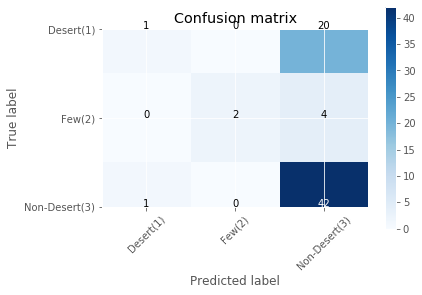

In [153]:
# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Desert(1)','Few(2)','Non-Desert(3)'],normalize= False,  title='Confusion matrix')

In [154]:
#SVM Performance
print("ARI =", adjusted_rand_score(y_test, yhat))


ARI = 0.08693805531443062


## At least we are in the tenths, no longer the hundredths for ARI value...C value is pretty high. Rbf method worked best. Despite thinking that setting the class_weights to 'balanced' would Improve the SVM model, it made it worse, taking into account all other variables.  I guess we are better than random? Since there are many more samples for Non-Deserts the model tends to classify everything as Non-Desert. It is able to classify correctly Deserts 24% of the time. Certainly this would not be a good model to predict which types of businessses are most likely in a certain CCD classification. However, this does show there is some type of "better" than random correlation between the types of businesses in a zipcode and if the area will be classified as a "Desert", "Non-Desert", or 